In [1]:
import Environment_non_stationary
import Shop
from mab.ucb_learner import *
from utilities import *

In [2]:
shop_detection_ts = Shop.Shop()
shop_ucb = Shop.Shop()

shop_ts = Shop.Shop()
#shop_big_ts = Shop.Shop()
shop_c = Shop.Shop()

env = Environment_non_stationary.Environment(shop_detection_ts.prices1, shop_detection_ts.prices2, shop_detection_ts.discounts, n_phases=4)

#shop_detection_ts.set_conv_rate(env.true_conv1[0], env.true_conv2[0])
#shop_ucb.set_conv_rate(env.true_conv1[0], env.true_conv2[0])

#shop_ts.set_conv_rate(env.true_conv1[0], env.true_conv2[0])
#shop_big_ts.set_conv_rate(env.true_conv1[0], env.true_conv2[0])
shop_c.set_conv_rate(env.true_conv1[0], env.true_conv2[0])


price_arms = [(i, j) for i in range(len(shop_detection_ts.prices1)) for j in range(len(shop_detection_ts.prices2))]
n_price_arms = len(price_arms)

matching_arms = [(i, j, k, l) for i in range(len(shop_ts.prices1)) for j in range(len(shop_ts.prices2)) for k in range(shop_ts.n_classes) for l in range(len(shop_ts.discounts))]
n_matching_arms = len(matching_arms)

detection_matching_arms = [(i, j, k, l) for i in range(len(shop_detection_ts.prices1)) for j in range(len(shop_detection_ts.prices2)) for k in range(shop_detection_ts.n_classes) for l in range(len(shop_detection_ts.discounts))]
detection_n_matching_arms = len(matching_arms)

small_matching_arms = [(i, j) for i in range(shop_detection_ts.n_classes) for j in range(len(shop_detection_ts.discounts))]
small_n_matching_arms = len(small_matching_arms)

shop_detection_ts.set_assignment_learner('TS', detection_n_matching_arms)
shop_ucb.set_assignment_learner('UCB', small_n_matching_arms)

shop_detection_ts.set_price_learner('TS', n_price_arms)
shop_ucb.set_price_learner('UCB', 5)

#shop_detection_ts.set_price2_learner('TS', 5)
shop_ucb.set_price2_learner('UCB', 5)

shop_ts.set_price_learner('TS', n_price_arms)
shop_ts.set_assignment_learner('TS', n_matching_arms)


#shop_big_ts.set_assignment_learner('TS', n_matching_arms)

In [3]:
generated_promo_ratios = np.array([0.4, 0.25, 0.2, 0.15])
max_ind_reward = max(env.prices1) + max(env.prices2)

In [4]:
cr11 = np.array([[0.60, 0.51, 0.28, 0.23, 0.19],
       [0.82, 0.65 , 0.40, 0.30, 0.21],
       [0.80, 0.66, 0.60, 0.22 , 0.16],
       [0.91, 0.73, 0.69, 0.19, 0.12]])

cr12 = np.array([[0.60, 0.51, 0.38, 0.33, 0.29],
       [0.92, 0.80 , 0.65, 0.50, 0.45],
       [0.80, 0.66, 0.60, 0.42 , 0.37],
       [0.91, 0.73, 0.69, 0.49, 0.45]])

cr13 = np.array([[0.90, 0.81, 0.68, 0.53, 0.49],
       [0.82, 0.65 , 0.40, 0.30, 0.21],
       [0.70, 0.56, 0.40, 0.16 , 0.10],
       [0.91, 0.73, 0.69, 0.19, 0.12]])

cr14 = np.array([[0.70, 0.51, 0.28, 0.23, 0.19],
       [0.92, 0.65 , 0.40, 0.30, 0.21],
       [0.90, 0.66, 0.60, 0.22 , 0.16],
       [0.98, 0.83, 0.79, 0.59, 0.32]])

env.true_conv1[0] = cr11
env.true_conv1[1] = 1-cr12 # This introduces an abrupt change
env.true_conv1[2] = cr13
env.true_conv1[3] = 1-cr14 # This introduces an abrupt change

cr22 = np.array([[[0.65, 0.58, 0.48, 0.43, 0.29],
                [0.70, 0.68, 0.55, 0.50, 0.55],
                [0.75, 0.70, 0.60, 0.59, 0.40],
                [0.95, 0.88, 0.85, 0.80, 0.58]],

       [[0.72, 0.55 , 0.30, 0.28, 0.11],
        [0.75, 0.60 , 0.35, 0.33, 0.16],
        [0.82, 0.65 , 0.40, 0.38, 0.21],
        [0.85, 0.75 , 0.55, 0.52, 0.25]],

       [[0.80, 0.66, 0.60, 0.55 , 0.16],
        [0.84, 0.72, 0.66, 0.62 , 0.18],
        [0.89, 0.78, 0.70, 0.67 , 0.20],
        [0.95, 0.85, 0.79, 0.73 , 0.25]],

       [[0.91, 0.73, 0.69, 0.53, 0.12],
        [0.93, 0.76, 0.74, 0.64, 0.17],
        [0.96, 0.79, 0.78, 0.70, 0.25],
        [0.97, 0.83, 0.81, 0.77, 0.45]]])

cr21 = np.array([[[0.60, 0.51, 0.28, 0.23, 0.19],
                [0.65, 0.55, 0.35, 0.30, 0.25],
                [0.70, 0.60, 0.40, 0.35, 0.30],
                [0.90, 0.80, 0.75, 0.50, 0.38]],

       [[0.72, 0.55 , 0.30, 0.20, 0.11],
        [0.75, 0.60 , 0.35, 0.25, 0.16],
        [0.82, 0.65 , 0.40, 0.30, 0.21],
        [0.85, 0.75 , 0.55, 0.40, 0.25]],

       [[0.80, 0.66, 0.60, 0.22 , 0.16],
        [0.84, 0.72, 0.66, 0.28 , 0.18],
        [0.89, 0.78, 0.70, 0.38 , 0.20],
        [0.95, 0.85, 0.79, 0.58 , 0.25]],

       [[0.91, 0.73, 0.69, 0.19, 0.12],
        [0.93, 0.76, 0.74, 0.25, 0.17],
        [0.96, 0.79, 0.78, 0.40, 0.25],
        [0.97, 0.83, 0.81, 0.50, 0.45]]])

cr23 = np.array([[[0.60, 0.51, 0.48, 0.23, 0.19],
                [0.65, 0.55, 0.50, 0.30, 0.25],
                [0.70, 0.60, 0.55, 0.35, 0.30],
                [0.90, 0.80, 0.78, 0.50, 0.38]],

       [[0.72, 0.55 , 0.50, 0.20, 0.11],
        [0.75, 0.60 , 0.55, 0.25, 0.16],
        [0.82, 0.65 , 0.61, 0.30, 0.21],
        [0.85, 0.75 , 0.72, 0.40, 0.25]],

       [[0.80, 0.66, 0.64, 0.22 , 0.16],
        [0.84, 0.72, 0.69, 0.28 , 0.18],
        [0.89, 0.78, 0.75, 0.38 , 0.20],
        [0.95, 0.85, 0.83, 0.58 , 0.25]],

       [[0.91, 0.78, 0.75, 0.19, 0.12],
        [0.93, 0.82, 0.77, 0.25, 0.17],
        [0.96, 0.89, 0.84, 0.40, 0.25],
        [0.97, 0.93, 0.88, 0.50, 0.45]]])

cr24 = np.array([[[0.65, 0.58, 0.48, 0.33, 0.29],
                [0.70, 0.68, 0.55, 0.40, 0.55],
                [0.75, 0.70, 0.60, 0.55, 0.40],
                [0.95, 0.88, 0.85, 0.70, 0.58]],

       [[0.72, 0.55 , 0.30, 0.20, 0.11],
        [0.75, 0.60 , 0.35, 0.25, 0.16],
        [0.82, 0.65 , 0.40, 0.30, 0.21],
        [0.85, 0.75 , 0.55, 0.40, 0.25]],

       [[0.80, 0.66, 0.60, 0.22 , 0.16],
        [0.84, 0.72, 0.66, 0.28 , 0.18],
        [0.89, 0.78, 0.70, 0.38 , 0.20],
        [0.95, 0.85, 0.79, 0.58 , 0.25]],

       [[0.71, 0.53, 0.49, 0.10, 0.05],
        [0.73, 0.56, 0.54, 0.15, 0.10],
        [0.76, 0.59, 0.58, 0.22, 0.15],
        [0.77, 0.63, 0.61, 0.28, 0.17]]])

env.true_conv2[0] = cr21
env.true_conv2[1] = 1-cr22 # This introduces an abrupt change
env.true_conv2[2] = cr23
env.true_conv2[3] = 1-cr24 # This introduces an abrupt change

In [5]:
shop_c.set_expected_customers(np.array([25, 25, 25, 25]))
cec = shop_c.get_customer_list()
cep = shop_c.get_promo_list(generated_promo_ratios)

clairvoyant_promo_fractions = []
clairvoyant_p1s = []
clairvoyant_p2s = []
clairvoyant_p1_idxs = []
clairvoyant_p2_idxs = []
for i in range(env.n_phases):
    shop_c.set_conv_rate(env.true_conv1[i], env.true_conv2[i])

    cmt, cpa, cer, ers  = shop_c.get_clairvoyant_prices_and_matching(cec, cep, 5, 5)
    cp1idx = price_arms[cpa][0]
    cp2idx = price_arms[cpa][1]
    cp1 = env.prices1[cp1idx]
    cp2 = env.prices2[cp2idx]

    cpf = shop_c.get_promo_fractions_from_tuples(cmt)

    clairvoyant_promo_fractions.append(cpf)
    clairvoyant_p1s.append(cp1)
    clairvoyant_p2s.append(cp2)
    clairvoyant_p1_idxs.append(cp1idx)
    clairvoyant_p2_idxs.append(cp2idx)



In [6]:
clairvoyant_promo_fractions

[array([[0. , 1. , 0. , 0. ],
        [0. , 0. , 0.4, 0.6],
        [0.6, 0. , 0.4, 0. ],
        [1. , 0. , 0. , 0. ]]),
 array([[1. , 0. , 0. , 0. ],
        [0. , 0.4, 0. , 0.6],
        [0.6, 0. , 0.4, 0. ],
        [0. , 0.6, 0.4, 0. ]]),
 array([[0.4, 0. , 0. , 0.6],
        [0.2, 0. , 0.8, 0. ],
        [0. , 1. , 0. , 0. ],
        [1. , 0. , 0. , 0. ]]),
 array([[1. , 0. , 0. , 0. ],
        [0. , 1. , 0. , 0. ],
        [0.6, 0. , 0.4, 0. ],
        [0. , 0. , 0.4, 0.6]])]

In [7]:
days = 365

u_rewards_per_class_per_day = []
detection_ts_rewards_per_class_per_day = []

ts_rewards_per_class_per_day = []
#big_ts_rewards_per_class_per_day = []
c_rewards_per_class_per_day = []

customers_em = np.array([0, 0, 0, 0])
customers_ie = np.array([25, 25, 25, 25])

for day in range(days):
    if day == 0:
        shop_ts.set_expected_customers(customers_ie)
        #shop_big_ts.set_expected_customers(customers_ie)
        shop_ucb.set_expected_customers(customers_ie)
        shop_detection_ts.set_expected_customers(customers_ie)
    else:
        customers_em = (customers_em*(day-1) + env.customers) / day
        shop_ucb.set_expected_customers((customers_em + 0.99).astype(int))
        shop_detection_ts.set_expected_customers((customers_em + 0.99).astype(int))
        shop_ts.set_expected_customers((customers_em + 0.99).astype(int))
        #shop_big_ts.set_expected_customers((customers_em + 0.99).astype(int))
    
    # select the price for 2 step learner
    chosen_price_tuple_idx_ts = shop_ts.price_learner.pull_arm()
    chosen_price_tuple_idx_detection_ts = shop_detection_ts.price_learner.pull_arm()

    price1idx_ts = price_arms[chosen_price_tuple_idx_ts][0]
    price2idx_ts = price_arms[chosen_price_tuple_idx_ts][1]
    price1_ts = env.prices1[price_arms[chosen_price_tuple_idx_ts][0]]
    price2_ts = env.prices2[price_arms[chosen_price_tuple_idx_ts][1]]

    price1idx_detection_ts = price_arms[chosen_price_tuple_idx_detection_ts][0]
    price2idx_detection_ts = price_arms[chosen_price_tuple_idx_detection_ts][1]
    price1_detection_ts = env.prices1[price_arms[chosen_price_tuple_idx_detection_ts][0]]
    price2_detection_ts = env.prices2[price_arms[chosen_price_tuple_idx_detection_ts][1]]

    # perform matching and get promo fractions for 2 step learner
    expected_customers_ts = shop_ts.get_customer_list()
    expected_promos_ts = shop_ts.get_promo_list(generated_promo_ratios)

    expected_customers_detection_ts = shop_detection_ts.get_customer_list()
    expected_promos_detection_ts = shop_detection_ts.get_promo_list(generated_promo_ratios)

    matched_tuples_ts = shop_ts.assignment_learner.pull_arm_matching(expected_customers_ts, expected_promos_ts, matching_arms, price1idx_ts, price2idx_ts)
    matched_tuples_detection_ts = shop_detection_ts.assignment_learner.pull_arm_matching(expected_customers_detection_ts, expected_promos_detection_ts, detection_matching_arms, price1idx_detection_ts, price2idx_detection_ts)
    
    promo_fractions_ts = shop_ts.get_promo_fractions_from_tuples(matched_tuples_ts)
    promo_fractions_detection_ts = shop_detection_ts.get_promo_fractions_from_tuples(matched_tuples_detection_ts)

    # get promo fractions and prices for big learner
    # expected_customers_big_ts = shop_big_ts.get_customer_list()
    # expected_promos_big_ts = shop_big_ts.get_promo_list(generated_promo_ratios)
    # matched_tuples_big_ts, price_arm_index_big_ts = shop_big_ts.assignment_learner.pull_arm_all(expected_customers_big_ts, expected_promos_big_ts, matching_arms, len(env.prices1), len(env.prices2))
    # promo_fractions_big_ts = shop_big_ts.get_promo_fractions_from_tuples(matched_tuples_big_ts)

    # price1idx_big_ts = price_arms[price_arm_index_big_ts][0]
    # price2idx_big_ts = price_arms[price_arm_index_big_ts][1]
    # price1_big_ts = env.prices1[price1idx_big_ts]
    # price2_big_ts = env.prices2[price2idx_big_ts]

    # get expected list of customers
    expected_customers_u = shop_ucb.get_customer_list()
    #expected_customers_detection_ts = shop_detection_ts.get_customer_list()

    # get expected list of promos
    expected_promos_u = shop_ucb.get_promo_list(generated_promo_ratios) 
    #expected_promos_detection_ts = shop_detection_ts.get_promo_list(generated_promo_ratios) 

    #Pull arm price1 from learners 
    #chosen_price1_detection_ts = env.prices1[shop_detection_ts.price_learner.pull_arm()]
    chosen_price1_ucb = env.prices1[shop_ucb.price_learner.pull_arm()] 

    #Pull arm price2 from learners 
    #chosen_price2_detection_ts = env.prices2[shop_detection_ts.price2_learner.pull_arm()]
    chosen_price2_ucb = env.prices2[shop_ucb.price2_learner.pull_arm()] 
    

    # generate the connections and their expected weights
    matched_tuples_u = shop_ucb.assignment_learner.pull_arm_matching(expected_customers_u, expected_promos_u, small_matching_arms)
    #matched_tuples_detection_ts = shop_detection_ts.assignment_learner.pull_arm_matching(expected_customers_detection_ts, expected_promos_detection_ts, small_matching_arms)
 
    promo_fractions_u = shop_ucb.get_promo_fractions_from_tuples(matched_tuples_u)
    #promo_fractions_detection_ts = shop_detection_ts.get_promo_fractions_from_tuples(matched_tuples_detection_ts)

    # simulate the day
    env.generate_next_day_customers()

    enum_customers = list(enumerate(env.customers))
    customers = np.concatenate([np.ones(c).astype(int)*p for p,c in enum_customers])
    np.random.shuffle(customers)

    revenue_detection_ts = []
    revenue_ucb = []
    revenue_ts = []
    #revenue_big_ts = []
    revenue_c = []

    detection_ts_total_reward = 0
    ucb_total_reward = 0
    #big_ts_total_reward = 0
    ts_total_reward = 0
    c_total_reward = 0

    c_count = 0

    phase = env.get_phase(days) % env.n_phases

    for cust in customers:
        ts_ind_reward = 0

        selected_promo_detection_ts = np.random.choice([0, 1, 2, 3], 1, p=promo_fractions_detection_ts[cust])
        selected_promo_u = np.random.choice([0, 1, 2, 3], 1, p=promo_fractions_u[cust])
        selected_promo_ts = np.random.choice([0, 1, 2, 3], 1, p=promo_fractions_ts[cust])
        #selected_promo_big_ts = np.random.choice([0, 1, 2, 3], 1, p=promo_fractions_big_ts[cust])
        selected_promo_c = np.random.choice([0, 1, 2, 3], 1, p=clairvoyant_promo_fractions[phase][cust])

        detection_ts_buy1 = env.round1(cust, price1_detection_ts)
        detection_ts_buy2 = 0
        if detection_ts_buy1:
            detection_ts_buy2 = env.round2(cust, selected_promo_detection_ts, price2_detection_ts)
        
        u_buy1 = env.round1(cust, chosen_price1_ucb)
        u_buy2 = 0
        if u_buy1:
            u_buy2 = env.round2(cust, selected_promo_u, chosen_price2_ucb)

        ts_buy1 = env.round1(cust, price1_ts)
        ts_buy2 = 0
        if ts_buy1:
            ts_buy2 = env.round2(cust, selected_promo_ts, price2_ts)

        # big_ts_buy1 = env.round1(cust, price1_big_ts)
        # big_ts_buy2 = 0
        # if big_ts_buy1:
        #     big_ts_buy2 = env.round2(cust, selected_promo_big_ts, price2_big_ts)


        c_buy1 = env.round1(cust, clairvoyant_p1s[phase], days)
        c_buy2 = 0
        if c_buy1:
            c_buy2 = env.round2(cust, selected_promo_c, clairvoyant_p2s[phase], days)
        
        detection_ts_ind_reward= detection_ts_buy1*price1_detection_ts + detection_ts_buy2*price2_detection_ts*(1-shop_detection_ts.discounts[selected_promo_detection_ts])
        u_ind_reward = u_buy1*chosen_price1_ucb + u_buy2*chosen_price2_ucb*(1-shop_ucb.discounts[selected_promo_u])
        ts_ind_reward = ts_buy1*price1_ts + ts_buy2*price2_ts*(1-shop_ts.discounts[selected_promo_ts])
        # big_ts_ind_reward = big_ts_buy1*price1_big_ts + big_ts_buy2*price2_big_ts*(1-shop_big_ts.discounts[selected_promo_big_ts])
        c_ind_reward = clairvoyant_p1s[phase]*env.true_conv1[phase, cust, cp1idx] + env.true_conv1[phase, cust, cp1idx]*env.true_conv2[phase, selected_promo_c, cust, cp2idx]*clairvoyant_p2s[phase]*(1-shop_c.discounts[selected_promo_c])
        
        norm_detection_ts_ind_reward = detection_ts_ind_reward / max_ind_reward
        norm_u_ind_reward = u_ind_reward / max_ind_reward
        norm_ts_ind_reward = ts_ind_reward / max_ind_reward
        # norm_big_ts_ind_reward = big_ts_ind_reward / max_ind_reward
        norm_c_ind_reward = c_ind_reward / max_ind_reward

        # update price learner and assignment learner
        shop_ucb.assignment_learner.update(small_matching_arms.index((cust, selected_promo_u)), norm_u_ind_reward)
        
        shop_ts.price_learner.update(chosen_price_tuple_idx_ts, norm_ts_ind_reward)
        matching_arm_index_ts = matching_arms.index((price1idx_ts, price2idx_ts, cust, selected_promo_ts))
        shop_ts.assignment_learner.update(matching_arm_index_ts, norm_ts_ind_reward)

        shop_detection_ts.price_learner.update(chosen_price_tuple_idx_detection_ts, norm_detection_ts_ind_reward)
        matching_arm_index_detection_ts = detection_matching_arms.index((price1idx_detection_ts, price2idx_detection_ts, cust, selected_promo_detection_ts))
        shop_detection_ts.assignment_learner.update(matching_arm_index_detection_ts, norm_detection_ts_ind_reward)

        # buradaki matching arm index sadece price ikilisini veriyor
        # matching_arm_index_big_ts = matching_arms.index((price1idx_big_ts, price2idx_big_ts, cust, selected_promo_big_ts))
        # shop_big_ts.assignment_learner.update(matching_arm_index_big_ts, norm_big_ts_ind_reward)

        revenue_ucb.append(u_ind_reward)
        revenue_detection_ts.append(detection_ts_ind_reward)
        revenue_ts.append(ts_ind_reward)
        #revenue_big_ts.append(big_ts_ind_reward)
        revenue_c.append(c_ind_reward)

    detection_ts_rewards_per_class_per_day.append(np.mean(revenue_detection_ts))
    u_rewards_per_class_per_day.append(np.mean(revenue_ucb))
    ts_rewards_per_class_per_day.append(np.mean(revenue_ts))
    # big_ts_rewards_per_class_per_day.append(np.mean(revenue_big_ts))
    c_rewards_per_class_per_day.append(np.mean(revenue_c))
    
    shop_detection_ts.detect_phase_change(c_rewards_per_class_per_day[-1])

CHANGE DETECTED!
CHANGE DETECTED!
CHANGE DETECTED!


Text(0, 0.5, 'Revenue')

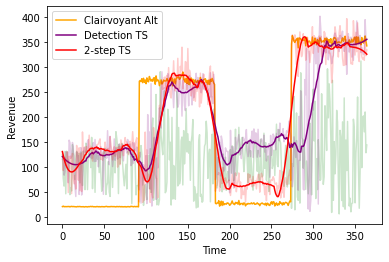

In [9]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.plot(u_rewards_per_class_per_day, color='green', alpha=0.2)
#plt.plot(savgol_filter(u_rewards_per_class_per_day, 41, 3), color='green',label='UCB')
plt.plot(c_rewards_per_class_per_day, color='orange',label='Clairvoyant Alt')
#plt.plot(savgol_filter(c_rewards_per_class_per_day, 41, 3))
plt.plot(detection_ts_rewards_per_class_per_day, color='purple', alpha=0.2)
plt.plot(savgol_filter(detection_ts_rewards_per_class_per_day, 41, 3), color='purple',label='Detection TS')
plt.plot(ts_rewards_per_class_per_day, color='red', alpha=0.2)
plt.plot(savgol_filter(ts_rewards_per_class_per_day, 41, 3), color='red', label='2-step TS')
#plt.plot(big_ts_rewards_per_class_per_day, color='blue', alpha=0.2)
#plt.plot(savgol_filter(big_ts_rewards_per_class_per_day, 41, 3), color='blue', label='Big TS')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Revenue')

Text(0, 0.5, 'Cumulative Revenue')

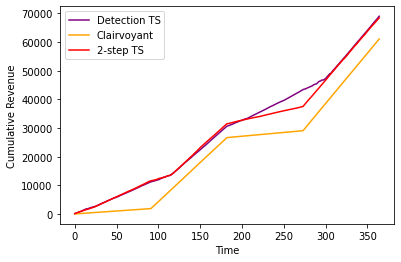

In [10]:
#plt.plot(np.cumsum(u_rewards_per_class_per_day), color='green', label='UCB')
plt.plot(np.cumsum(detection_ts_rewards_per_class_per_day), color='purple', label='Detection TS')
plt.plot(np.cumsum(c_rewards_per_class_per_day), color='orange', label='Clairvoyant')
plt.plot(np.cumsum(ts_rewards_per_class_per_day), color='red', label='2-step TS')
#plt.plot(np.cumsum(big_ts_rewards_per_class_per_day), color='blue', label='Big TS')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Cumulative Revenue')

Text(0, 0.5, 'Regret')

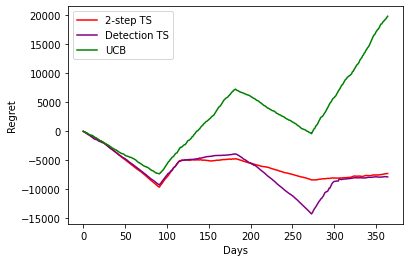

In [11]:
plt.plot(np.cumsum(np.array(c_rewards_per_class_per_day) - np.array(ts_rewards_per_class_per_day)), color='red', label='2-step TS')
#plt.plot(np.cumsum(np.array(c_rewards_per_class_per_day) - np.array(big_ts_rewards_per_class_per_day)), color='blue', label='Big TS')
plt.plot(np.cumsum(np.array(c_rewards_per_class_per_day) - np.array(detection_ts_rewards_per_class_per_day)), color='purple', label='Detection TS')
plt.plot(np.cumsum(np.array(c_rewards_per_class_per_day) - np.array(u_rewards_per_class_per_day)), color='green', label='UCB')

plt.legend()
plt.xlabel('Days')
plt.ylabel('Regret')